# KNN

In [10]:
from preprocessing import preprocessing_data
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import tree
from joblib import Parallel, delayed
from itertools import product
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

df_raw = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df_knn = preprocessing_data(df_raw)
genres = df_knn['track_genre'].unique()


In [2]:
label_encoder = LabelEncoder()

df_knn['track_genre'] = label_encoder.fit_transform(df_knn['track_genre'])
X_train, X_test, y_train, y_test = train_test_split(df_knn.drop(['track_genre'], axis=1), df_knn.track_genre, test_size=0.2)
X_train['explicit'] = X_train['explicit'].astype(int)
X_test['explicit'] = X_test['explicit'].astype(int)

k = 14
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
mse = mean_squared_error(y_train, knn_train_pred)
rmse = sqrt(mse)
print(f"rMSE: {rmse}")

knn_score = knn.score(X_test, y_test)
print(f"kNN Accuracy: {knn_score}")

rMSE: 4.0049218474396024
kNN Accuracy: 0.4525357090901332


Cross Validation

In [3]:
param_grid = {'n_neighbors': range(1, 26)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")

# Train the model with the optimal k
knn_optimal = KNeighborsRegressor(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# Predict and evaluate
knn_train_pred_optimal = knn_optimal.predict(X_train)
mse_optimal = mean_squared_error(y_train, knn_train_pred_optimal)
rmse_optimal = sqrt(mse_optimal)
print(f"Optimal rMSE: {rmse_optimal}")

knn_test_pred_optimal = knn_optimal.predict(X_test)
knn_score_optimal = knn_optimal.score(X_test, y_test)
print(f"Optimal kNN Accuracy: {knn_score_optimal}")


Optimal k: 12
Optimal rMSE: 3.9588760616909444
Optimal kNN Accuracy: 0.45384169290370513


# Decision Trees

In [4]:

X_train, X_test, y_train, y_test = train_test_split(df_knn.drop(['track_genre'], axis=1),
                                                    df_knn.track_genre, test_size=0.3)

music_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=20, max_depth=20)
music_tree.fit(X_train, y_train)

music_tree_pred = music_tree.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, music_tree_pred))
print("Accuracy: \n", metrics.accuracy_score(y_test, music_tree_pred))
print(classification_report(y_test, music_tree_pred))

Confusion Matrix: 
 [[135  15  20  11  10   0  33   4  33   0  10   2  16   8   1   8  13   0
    2   5]
 [  3 111   7   1   2   1  29  13  15  10  11   4  11  12  13   8  13   0
   10   9]
 [ 14   5 189   3  30   0   1   9   7   1   9   0   2  17  12   0   0   2
    1   0]
 [ 19   2   5 181  15   2   2   1  11   1   6   1  11   2   1   5   1  22
   12   1]
 [ 17   7  26  30 119   7   1   6  12   0  20   1   3   7   4  10   8   1
   22   0]
 [  0   2   0   5   3 204   1   6   0   1   5   0   2   0  16  33   7   2
    3   0]
 [  9  22   2   1   3   0 161   0  21   0   1   1  12   3   0   1   9   0
    2  10]
 [  0  14   4   3   6  13   1 169   1  28  17   1   2   2  13   7   5   0
    5   1]
 [ 31  15   8   4  12   1  36   3 131   1  12   0  12   6   1   6  14   0
    2   5]
 [  0  21   1   1   2   0   2  43   0 220  10   0   1   0   7   0   1   0
    4   0]
 [  8  25   7   8  19  10  11  25   6   9  92   0  10  24  24  10   9   2
   13   4]
 [  3   7   3   0   9   0   4   0   4   0   1

In [5]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=123)


grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.5785854429688875
              precision    recall  f1-score   support

           0       0.39      0.40      0.40       326
           1       0.30      0.42      0.35       283
           2       0.58      0.61      0.59       302
           3       0.58      0.55      0.56       301
           4       0.39      0.44      0.41       301
           5       0.66      0.68      0.67       290
           6       0.48      0.58      0.53       258
           7       0.52      0.58      0.54       292
           8       0.45      0.42      0.43       300
           9       0.80      0.68      0.74       313
          10       0.38      0.29      0.33       316
          11       0.90      0.84      0.87       285
          12       0.53      0.48      0.50       309
          13       0.

Cross Validation

In [6]:
cv_score_dt = cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy')
cv_score_dt

array([0.53717627, 0.51505017, 0.52508361, 0.52090301, 0.49749164])

In [7]:
np.mean(cv_score_dt)

0.5191409404224049

The following plot shows the process of the decision tree. The different labels are color coded in each of the boxes, with the strength of the predictions represented by the transparency of the color.

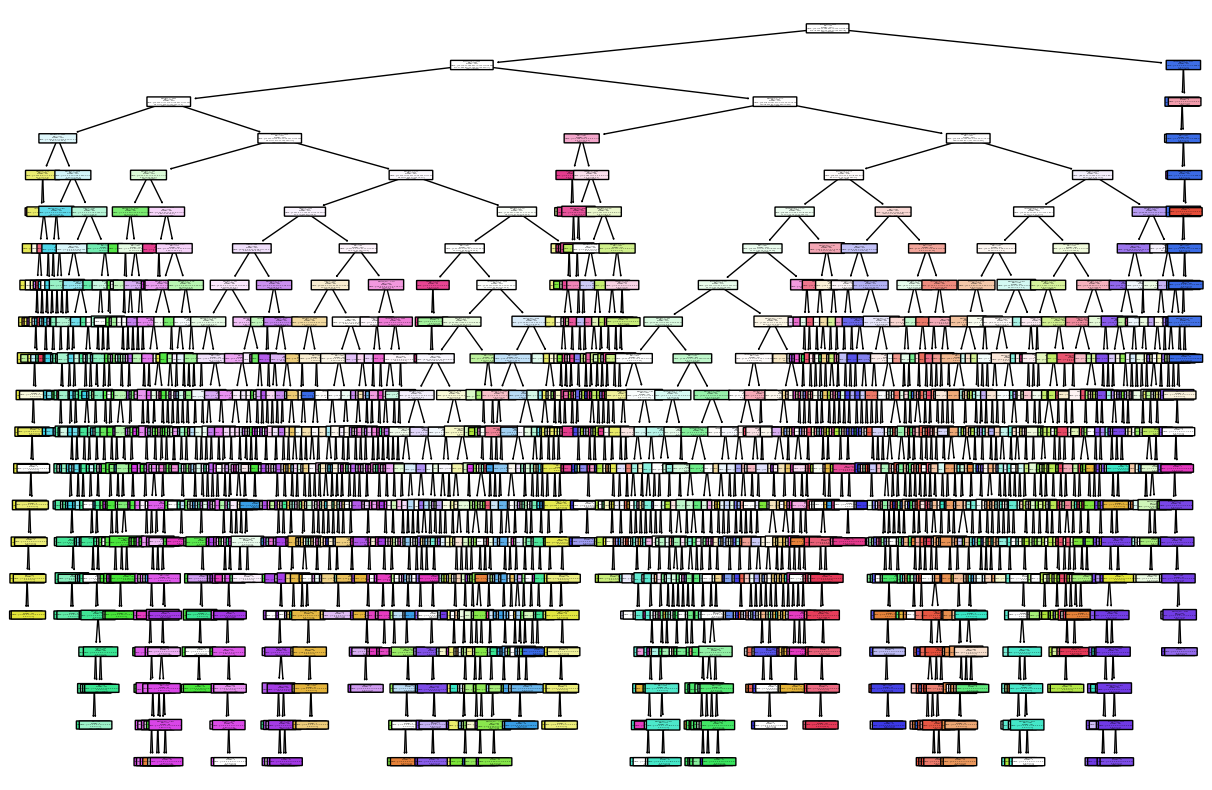

In [12]:
plt.figure(figsize=(15,10))
plot_tree(music_tree, filled=True, feature_names=list(X_train.columns), class_names= list(genres), rounded=True)
plt.show()